<a href="https://colab.research.google.com/github/AdarshSrinivas/TCS-ION-125/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [2]:
!git clone https://github.com/AdarshSrinivas/TCS-ION-125

fatal: destination path 'TCS-ION-125' already exists and is not an empty directory.


In [3]:
from imutils import paths
Categories=['Drone','Cars','Ice cream cone','Cricket ball']
flat_data_arr=[]
target_arr=[]
datadir = "TCS-ION-125/"
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target

loading... category : Drone
loaded category:Drone successfully
loading... category : Cars
loaded category:Cars successfully
loading... category : Ice cream cone
loaded category:Ice cream cone successfully
loading... category : Cricket ball
loaded category:Cricket ball successfully


In [4]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')


Splitted Successfully


In [5]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


{'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}

In [6]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([0, 1, 1, 1, 3, 0, 1, 1, 1, 2, 0, 1, 0, 1, 3, 0, 1, 2, 0, 3, 2, 2,
       3, 1, 3, 3, 1])

In [7]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([1, 3, 3, 0, 0, 0, 1, 3, 1, 2, 1, 1, 0, 3, 3, 1, 0, 2, 0, 2, 2, 2,
       2, 0, 1, 3, 1])

In [10]:
#classification_report(y_pred,y_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
#confusion_matrix(y_pred,y_test)

The model is 48.148148148148145% accurate


Enter URL of Imagehttps://c.ndtvimg.com/2019-05/tk4tpt5g_plane-generic_625x300_29_May_19.jpg


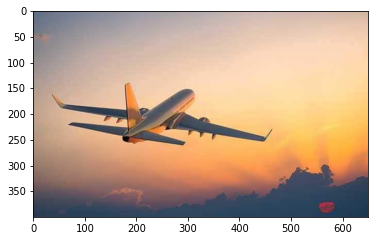

Drone = 30.06407829505282%
Cars = 15.547311639288022%
Ice cream cone = 23.982039522829872%
Cricket ball = 30.406570542829275%
The predicted image is : Drone


In [22]:
url=input('Enter URL of Image')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

In [20]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[3, 3, 0, 1],
       [3, 4, 0, 1],
       [0, 0, 4, 2],
       [0, 4, 0, 2]])

In [16]:
print(classification_report(y_test, y_pred))
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

              precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.36      0.50      0.42         8
           2       1.00      0.67      0.80         6
           3       0.33      0.33      0.33         6

    accuracy                           0.48        27
   macro avg       0.55      0.48      0.50        27
weighted avg       0.53      0.48      0.50        27

Classification accuracy : 0.5385


In [17]:

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.4615


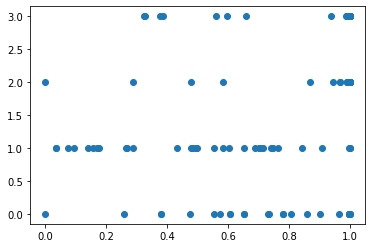

In [18]:
plt.scatter(x_train.iloc[:, 1:2], y_train)
plt.show()

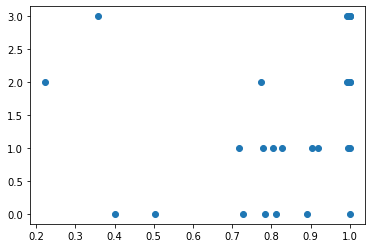

In [19]:
plt.scatter(x_test.iloc[:, 1:2], y_test)
plt.show()